In [21]:

import pandas as pd
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
''' Statsmodels implementation '''
def CrossCorrelation(sig1, sig2, lags = 50):
    corr = sm.tsa.stattools.ccf(sig2, sig1, adjusted = False)
    return corr[0:lags+1]

def CrossCorr3DMatrix(dataFrame, lags = 50):
    n = dataFrame.shape[1]
    result = np.zeros((n, n, lags+1))
    for i in range(n):
        for j in range(n):
            result[i, j, :] = np.array(CrossCorrelation(dataFrame.iloc[:,i], dataFrame.iloc[:,j], lags))
    return result


In [23]:
#Read
dataFrame = pd.read_excel("../data/DataAirTrain.xlsx",index_col= 'time', sheet_name="DataAirTrain")
dataFrame.drop(columns=dataFrame.columns[0], axis=1, inplace=True)
dataFrame = dataFrame.tail(1000)

In [24]:
dataFrame[['Radiation']] = dataFrame[['Radiation']].fillna(0)
dataFrame = dataFrame.interpolate(method='linear')

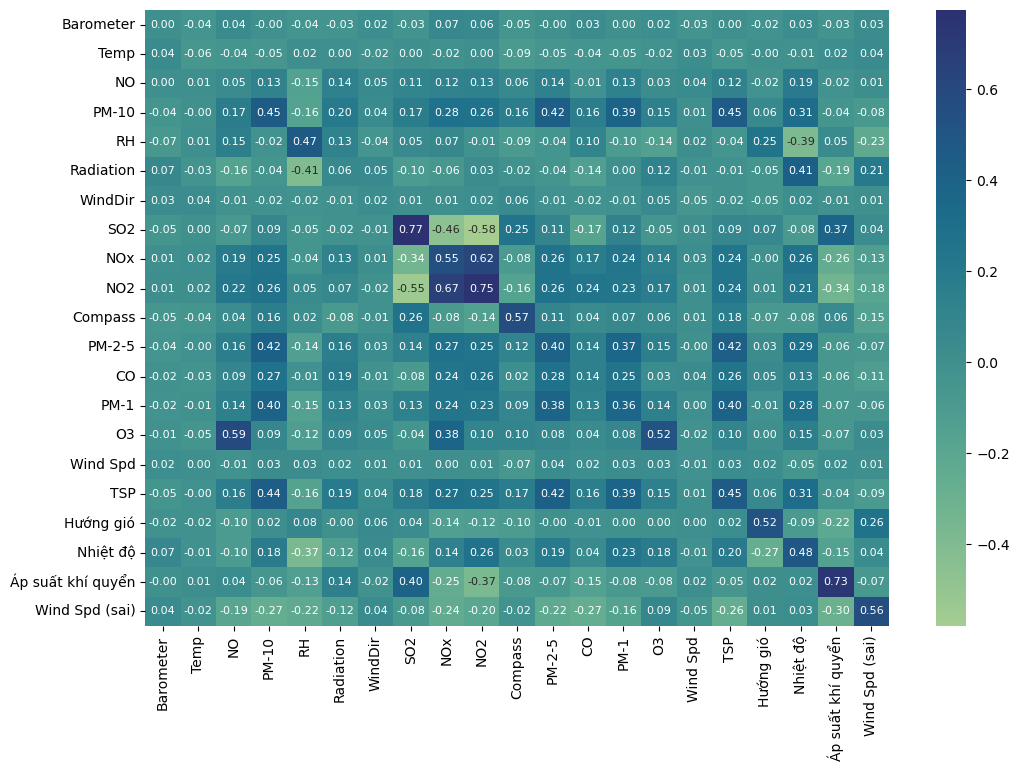

In [25]:
crossCorr3D = CrossCorr3DMatrix(dataFrame)
labels = dataFrame.columns.values
lag = 1
df = pd.DataFrame(crossCorr3D[:,:,lag], index = labels, columns=labels)
fig, ax = plt.subplots(figsize=(12,8))
crossCorrFig = sns.heatmap(df, annot = True, annot_kws = {'size': 8}, fmt=".2f", cmap="crest", ax = ax)

In [26]:
# figure = crossCorrFig.get_figure()    
# figure.savefig(f'../figure/crossCorrFig{lag}.png',bbox_inches ="tight")